# Data Science com Python

Analise Exploratoria de Dados - Banco Modal



Import de pacotes

In [2]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 14.2 MB/s 


In [1]:
import sweetviz as sv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

ModuleNotFoundError: ignored

Fonte dos dados: https://www.kaggle.com/rashmiranu/banking-dataset-classification?select=new_train.csv

In [3]:
metadados = pd.read_excel('metadata.xlsx')

In [4]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [5]:
dados = pd.read_csv('new_train.csv', sep=',')

In [6]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [7]:
dados.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


Gerando a análise por meio da sweetviz

In [16]:
relatorio = sv.analyze(dados, 
                       target_feat='y')

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
relatorio.show_html('Analise_sweetviz.html')

Report Analise_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Estatísticas Basicas

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
dados.shape

(32950, 16)

In [ ]:
len(dados)

32950

In [ ]:
dados.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

In [ ]:
dados['marital'].unique()

array(['married', 'divorced', 'single', 'unknown'], dtype=object)

In [ ]:
dados['previous'].nunique()

8

In [ ]:
dados['previous'].value_counts()

0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

In [ ]:
dados['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

Análise Univariada

In [ ]:
dados['marital'].head()

0     married
1     married
2     married
3     married
4    divorced
Name: marital, dtype: object

In [ ]:
dados['marital'].tail()

32945     single
32946    married
32947    married
32948    married
32949    married
Name: marital, dtype: object

In [ ]:
dados['marital'].min()

'divorced'

In [ ]:
dados['age'].min()

17

In [ ]:
dados['age'].sum()

1318465

In [ ]:
dados['age'].sum() / dados['age'].count()

40.01411229135053

In [ ]:
dados['age'].mean()

40.01411229135053

In [ ]:
dados['age'].median()

38.0

In [ ]:
dados['age'].mode()

0    31
dtype: int64

In [ ]:
dados['age'].max()

98

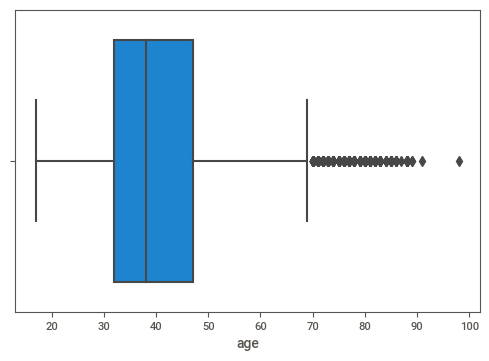

In [ ]:
sns.boxplot(x=dados['age'])

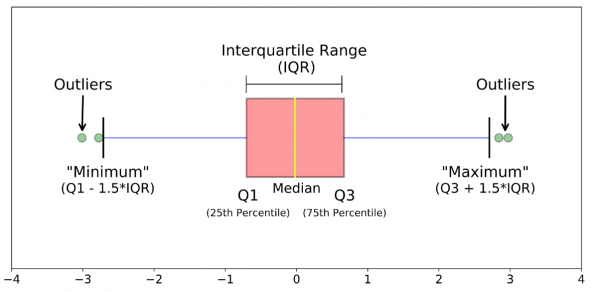

In [ ]:
display.Image("IQR.png")

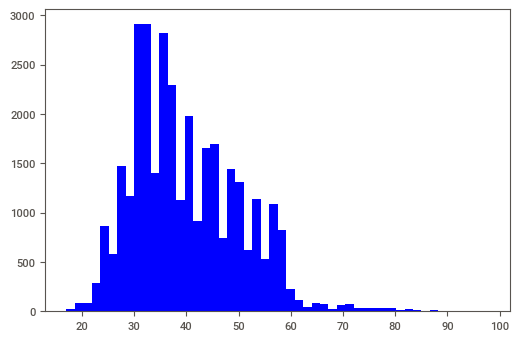

In [ ]:
plt.hist(dados['age'], 50, facecolor='b')
plt.show()

In [ ]:
dados.describe(include='int64')

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
dados.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


In [ ]:
# Análise de missings

dados.isnull().any()

age            False
job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
y              False
dtype: bool

In [ ]:
dados.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
dados['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [ ]:
dados['contact'].value_counts()

cellular     20908
telephone    12042
Name: contact, dtype: int64

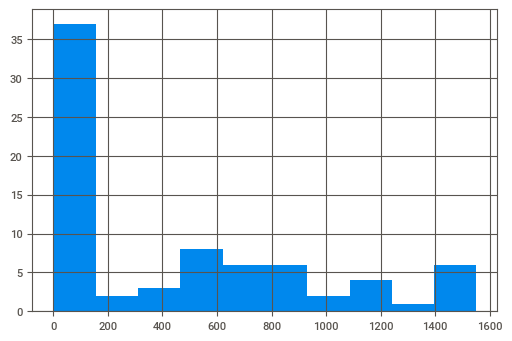

In [ ]:
dados['age'].value_counts().hist()

In [ ]:
tabela_cross_previous_y = pd.crosstab(index=dados['previous'],
                                      columns=dados['y'],
                                                    margins=True)
tabela_cross_previous_y

y,no,yes,All
previous,,,
0,25915,2501,28416
1,2889,784,3673
2,324,282,606
3,74,101,175
4,29,31,60
5,4,10,14
6,2,3,5
7,1,0,1
All,29238,3712,32950


In [ ]:
dados.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
dados['age'].dtypes

dtype('int64')

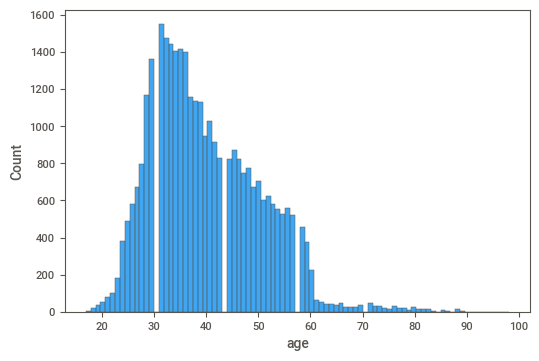

In [ ]:
sns.histplot(data=dados, x='age')

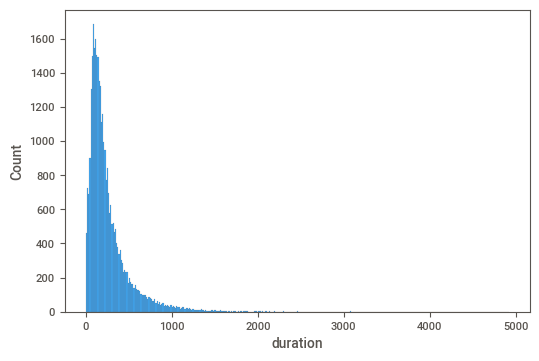

In [ ]:
sns.histplot(data=dados, x='duration')

In [ ]:
dados['age'].describe()

count    32950.000000
mean        40.014112
std         10.403636
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [ ]:
dados['marital'].describe()

count       32950
unique          4
top       married
freq        19953
Name: marital, dtype: object

Analise Bivariava

In [ ]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


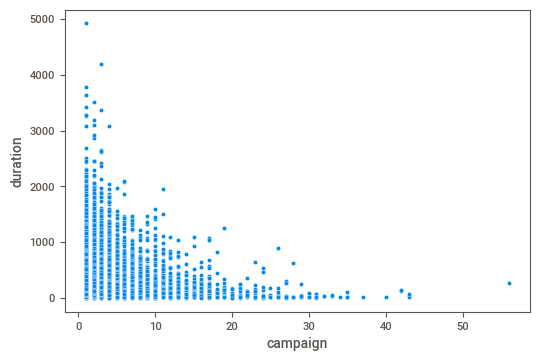

In [ ]:
sns.scatterplot(data=dados,
                x='campaign',
                y='duration')

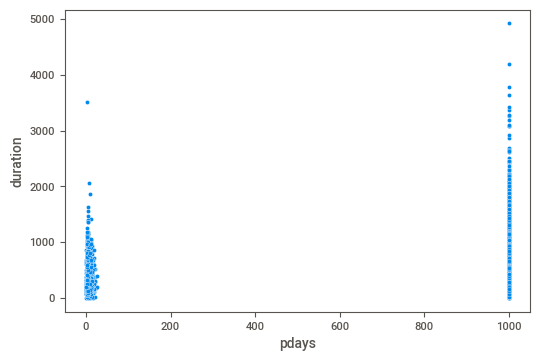

In [ ]:
sns.scatterplot(data=dados,
                x='pdays',
                y='duration')

In [ ]:
dados['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [ ]:
tabela_cross_default_y = pd.crosstab(index=dados['default'],
                                      columns=dados['y'],
                                                    margins=True)
tabela_cross_default_y

y,no,yes,All
default,,,
no,22656,3351,26007
unknown,6579,361,6940
yes,3,0,3
All,29238,3712,32950


In [ ]:
dados.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


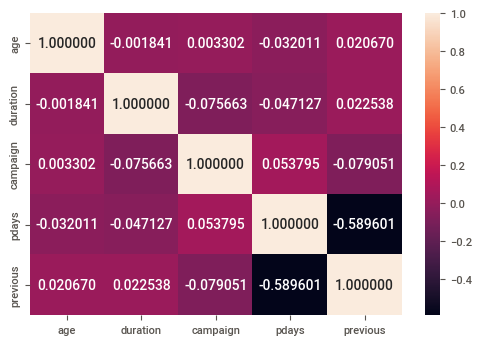

In [ ]:
sns.heatmap(dados.corr(), annot=True, fmt="f")

Plot de variáveis vategoricas

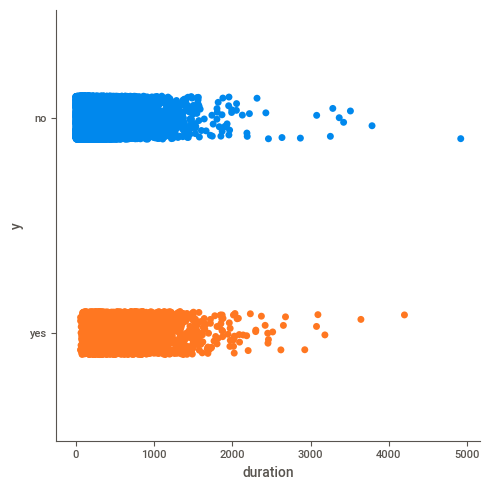

In [ ]:
sns.catplot(x='duration', 
            y='y',
            data=dados)

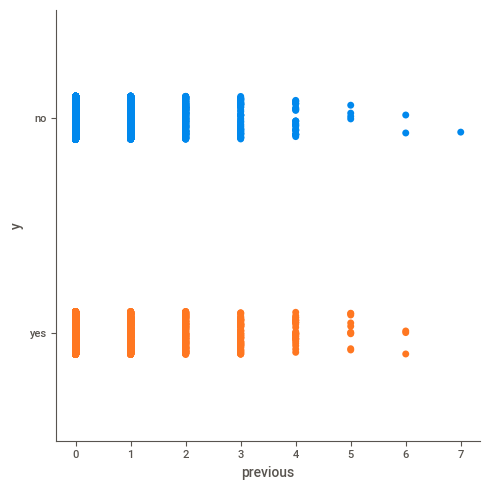

In [ ]:
sns.catplot(x='previous', 
            y='y',
            data=dados)

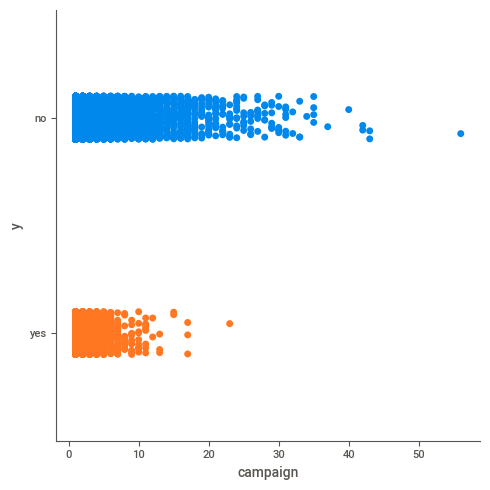

In [ ]:
sns.catplot(x='campaign', 
            y='y',
            data=dados)

Analise multivariada

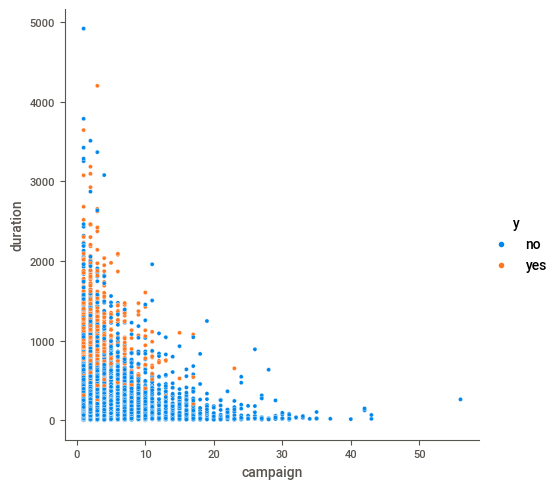

In [ ]:
sns.relplot(x='campaign',
            y='duration',
            hue='y',
            data=dados)

In [ ]:
dados.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

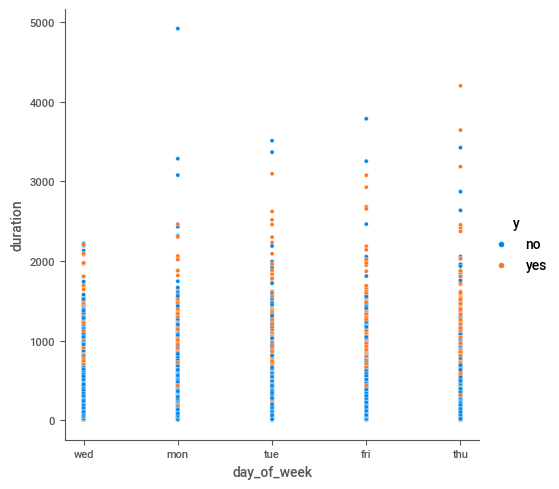

In [ ]:
sns.relplot(x='day_of_week',
            y='duration',
            hue='y',
            data=dados)

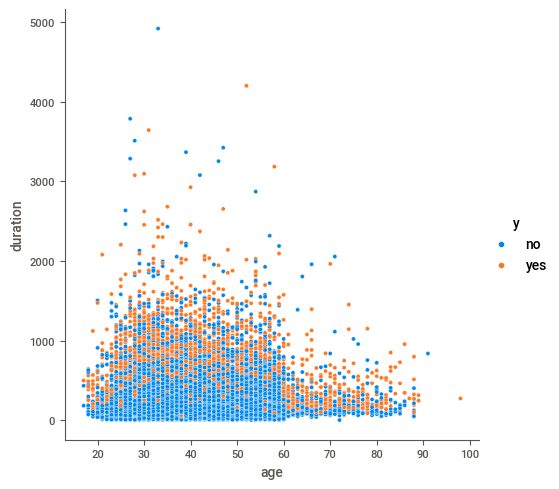

In [ ]:
sns.relplot(x='age',
            y='duration',
            hue='y',
            data=dados)

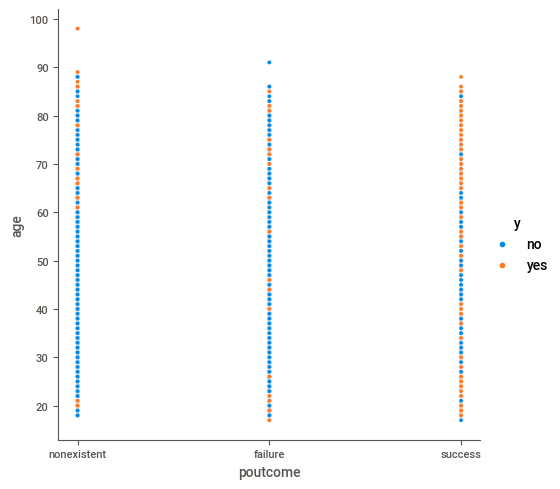

In [ ]:
sns.relplot(x='poutcome',
            y='age',
            hue='y',
            data=dados)

PCA - Análise de Componentes Principais

In [ ]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [ ]:
dados_pca = dados[['age','duration','campaign','pdays','previous']]

In [ ]:
dados_pca.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [ ]:
pca = PCA(n_components=2,
          random_state=42)

In [ ]:
pca

PCA(n_components=2, random_state=42)

In [ ]:
dados_pca_ajustado = StandardScaler().fit_transform(dados_pca)

In [ ]:
dados_pca_ajustado

array([[ 0.86373877, -0.12019627,  0.52298128,  0.19658384, -0.35012691],
       [-0.28972159, -0.2167318 , -0.20368791,  0.19658384,  1.65381294],
       [ 3.65126795,  3.43617293, -0.56702251,  0.19658384, -0.35012691],
       ...,
       [ 1.34434725, -0.49089273,  0.52298128,  0.19658384, -0.35012691],
       [-1.05869515, -0.3596044 , -0.56702251,  0.19658384, -0.35012691],
       [-0.48196498,  1.10387435,  0.15964669,  0.19658384, -0.35012691]])

In [ ]:
resultado_pca = pca.fit_transform(dados_pca_ajustado)

In [ ]:
resultado_pca_df = pd.DataFrame(resultado_pca,
                                columns=['componente1','componente2'])
resultado_pca_df.head()

,componente1,componente2
0,-0.425175,-0.509855
1,1.005371,-0.146158
2,0.265589,2.274575
3,-0.421084,-0.115342
4,-0.197363,0.194940


In [ ]:
pca.explained_variance_ratio_


array([0.32246681, 0.2116934 ])

In [ ]:
resultado_pca_df_y = pd.concat([dados['y'], resultado_pca_df], axis=1)
resultado_pca_df_y.head()

,y,componente1,componente2
0,no,-0.425175,-0.509855
1,no,1.005371,-0.146158
2,yes,0.265589,2.274575
3,no,-0.421084,-0.115342
4,no,-0.197363,0.194940


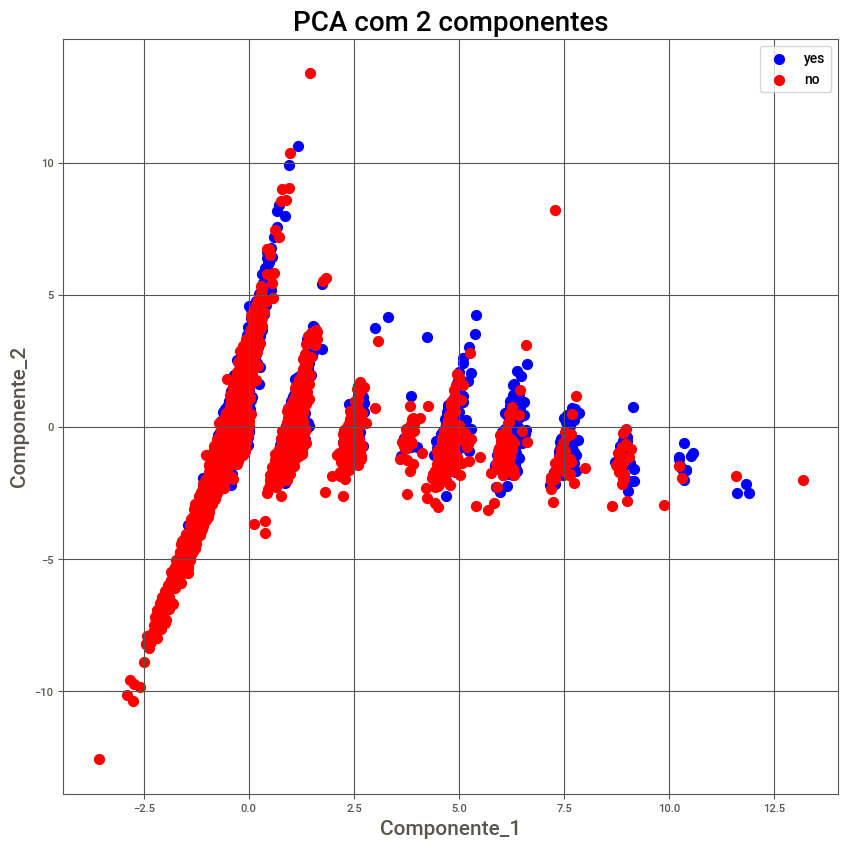

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Componente_1', fontsize= 15)
ax.set_ylabel('Componente_2', fontsize= 15)
ax.set_title('PCA com 2 componentes', fontsize= 20)

targets = ['yes','no']
cores = ['b', 'r']

for target, cor in zip(targets, cores):
  indices = resultado_pca_df_y['y'] == target
  ax.scatter(resultado_pca_df_y.loc[indices, 'componente1'],
             resultado_pca_df_y.loc[indices, 'componente2'],
             c= cor,
             s= 50)
  
ax.legend(targets)
ax.grid()